In [ ]:
# Set project directory
import os
import sys


def project_dir():
    notebook_path = %pwd
    repo_name = "worldbank_data_exploration"
    repo_folder = notebook_path.split(repo_name)[0]
    return os.path.join(repo_folder, repo_name)


pwd = os.getenv("PWD", project_dir())
os.environ["PWD"] = pwd
sys.path.append(pwd)

In [ ]:
import warnings

warnings.simplefilter("ignore", category=UserWarning)
warnings.simplefilter("ignore", category=FutureWarning)

from data_sources.load_dataset import (
    load_time_series,
    INDICATORS_SELECTED,
    INDICATORS_AGRICULTURE,
    INDICATORS_ECONOMY,
    INDICATORS_HEALTH,
    ALL_INDICATORS,
)
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.manifold import TSNE
from clustering import hierarchical_clustering

In [ ]:
def data_embedded_visualization(data_dict_clustered):
    for feature, X in data_dict_clustered.items():
        embedded = TSNE(n_components=2, perplexity=20, n_iter=4000).fit_transform(
            X[:, :-1]
        )
        plot_with_names(embedded, countries, X[:, -1], feature)


def data_combined_embedded_visualization(data_dict_clustered, title):
    embedded = TSNE(n_components=2, perplexity=20, n_iter=4000).fit_transform(
        data_dict_clustered[:, :-1]
    )
    plot_with_names(embedded, countries, data_dict_clustered[:, -1], title)


def plot_with_names(X, y, labels, title=None):
    plt.figure(figsize=(16, 16))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap=cm.Set1)
    for i in range(X.shape[0]):
        plt.annotate(y[i], [X[i, 0], X[i, 1]], size=7.5)
    if title is not None:
        plt.title(title)
    plt.show()

# Selected indicators

In [ ]:
NUMBER_OF_CLUSTERS_SELECTED_INDICATORS = {
    "Access to electricity (% of population)": 2,
    "Agriculture, forestry, and fishing, value added (% of GDP)": 2,
    "Exports of goods and services (% of GDP)": 3,
    "Fertility rate, total (births per woman)": 2,
    "Forest area (% of land area)": 2,
    "GDP growth (annual %)": 3,
    "Inflation, consumer prices (annual %)": 2,
    "Life expectancy at birth, total (years)": 2,
    "Merchandise trade (% of GDP)": 2,
    "Military expenditure (% of GDP)": 3,
    "Mortality rate, under-5 (per 1,000 live births)": 2,
    "Population growth (annual %)": 2,
    "Population in the largest city (% of urban population)": 2,
    "Total natural resources rents (% of GDP)": 2,
    "Unemployment, total (% of total labor force) (modeled ILO estimate)": 3,
}

NUMBER_OF_CLUSTERS_SELECTED_INDICATORS_EXTRACTION = {
    "Access to electricity (% of population)": 2,
    "Agriculture, forestry, and fishing, value added (% of GDP)": 2,
    "Exports of goods and services (% of GDP)": 2,
    "Fertility rate, total (births per woman)": 2,
    "Forest area (% of land area)": 2,
    "GDP growth (annual %)": 3,
    "Inflation, consumer prices (annual %)": 3,
    "Life expectancy at birth, total (years)": 2,
    "Merchandise trade (% of GDP)": 2,
    "Military expenditure (% of GDP)": 5,
    "Mortality rate, under-5 (per 1,000 live births)": 2,
    "Population growth (annual %)": 2,
    "Population in the largest city (% of urban population)": 2,
    "Total natural resources rents (% of GDP)": 4,
    "Unemployment, total (% of total labor force) (modeled ILO estimate)": 2,
}

NUMBER_OF_CLUSTERS_SELECTED_INDICATORS_COMBINED = 2
NUMBER_OF_CLUSTERS_SELECTED_INDICATORS_COMBINED_EXTRACTION = 3

selected_indicators_dict, countries, years = load_time_series(
    indicators=INDICATORS_SELECTED
)

## Each indicator separately - no feature extraction

In [ ]:
linkage_matrices = hierarchical_clustering.dendrogram_each_feature(
    selected_indicators_dict
)
selected_indicators_clustered = hierarchical_clustering.cluster_each_feature(
    selected_indicators_dict, linkage_matrices, NUMBER_OF_CLUSTERS_SELECTED_INDICATORS
)

In [ ]:
data_embedded_visualization(selected_indicators_clustered)

## Each indicator separately - with feature extraction

In [ ]:
linkage_matrices = hierarchical_clustering.dendrogram_each_feature(
    selected_indicators_dict, feature_extraction=True
)
selected_indicators_clustered_extraction = hierarchical_clustering.cluster_each_feature(
    selected_indicators_dict,
    linkage_matrices,
    NUMBER_OF_CLUSTERS_SELECTED_INDICATORS_EXTRACTION,
)

In [ ]:
data_embedded_visualization(selected_indicators_clustered_extraction)

## Combined indicators - no feature extraction

In [ ]:
linkage_matrix, y_all = hierarchical_clustering.dendrogram_features_combined(
    selected_indicators_dict, "Selected indicators combined"
)

In [ ]:
selected_indicators_combined_clustered = (
    hierarchical_clustering.cluster_combined_features(
        y_all, linkage_matrix, NUMBER_OF_CLUSTERS_SELECTED_INDICATORS_COMBINED
    )
)
data_combined_embedded_visualization(
    selected_indicators_combined_clustered, "Selected indicators combined"
)

## Combined indicators - with feature extraction

In [ ]:
linkage_matrix, y_all = hierarchical_clustering.dendrogram_features_combined(
    selected_indicators_dict,
    "Selected indicators combined - with feature extraction",
    feature_extraction=True,
)

In [ ]:
selected_indicators_combined_clustered = (
    hierarchical_clustering.cluster_combined_features(
        y_all,
        linkage_matrix,
        NUMBER_OF_CLUSTERS_SELECTED_INDICATORS_COMBINED_EXTRACTION,
    )
)
data_combined_embedded_visualization(
    selected_indicators_combined_clustered, "Selected indicators combined"
)

# Agriculture indicators

In [22]:
NUMBER_OF_CLUSTERS_AGRICULTURE_INDICATORS = {
    "Agricultural land (% of land area)": 2,
    "Agriculture, forestry, and fishing, value added (% of GDP)": 2,
    "Arable land (% of land area)": 2,
    "Arable land (hectares per person)": 2,
    "Cereal yield (kg per hectare)": 3,
    "Crop production index (2014-2016 = 100)": 2,
    "Employment in agriculture, female (% of female employment) (modeled ILO estimate)": 2,
    "Employment in agriculture, male (% of male employment) (modeled ILO estimate)": 2,
    "Fertilizer consumption (kilograms per hectare of arable land)": 2,
    "Food production index (2014-2016 = 100)": 2,
    "Forest area (% of land area)": 2,
    "Livestock production index (2014-2016 = 100)": 2,
    "Permanent cropland (% of land area)": 2,
    "Rural population (% of total population)": 2,
}

NUMBER_OF_CLUSTERS_AGRICULTURE_INDICATORS_EXTRACTION = {
    "Agricultural land (% of land area)": 3,
    "Agriculture, forestry, and fishing, value added (% of GDP)": 2,
    "Arable land (% of land area)": 3,
    "Arable land (hectares per person)": 2,
    "Cereal yield (kg per hectare)": 4,
    "Crop production index (2014-2016 = 100)": 2,
    "Employment in agriculture, female (% of female employment) (modeled ILO estimate)": 3,
    "Employment in agriculture, male (% of male employment) (modeled ILO estimate)": 3,
    "Fertilizer consumption (kilograms per hectare of arable land)": 4,
    "Food production index (2014-2016 = 100)": 2,
    "Forest area (% of land area)": 2,
    "Livestock production index (2014-2016 = 100)": 2,
    "Permanent cropland (% of land area)": 4,
    "Rural population (% of total population)": 2,
}

NUMBER_OF_CLUSTERS_AGRICULTURE_INDICATORS_COMBINED = 2
NUMBER_OF_CLUSTERS_AGRICULTURE_INDICATORS_COMBINED_EXTRACTION = 3

agriculture_indicators_dict, countries, years = load_time_series(
    indicators=INDICATORS_AGRICULTURE
)

## Each indicator separately - no feature extraction

In [ ]:
linkage_matrices = hierarchical_clustering.dendrogram_each_feature(
    agriculture_indicators_dict
)
agriculture_indicators_clustered = hierarchical_clustering.cluster_each_feature(
    agriculture_indicators_dict,
    linkage_matrices,
    NUMBER_OF_CLUSTERS_AGRICULTURE_INDICATORS,
)

In [ ]:
data_embedded_visualization(agriculture_indicators_clustered)

## Each indicator separately - with feature extraction

In [ ]:
linkage_matrices = hierarchical_clustering.dendrogram_each_feature(
    agriculture_indicators_dict, feature_extraction=True
)
agriculture_indicators_clustered = hierarchical_clustering.cluster_each_feature(
    agriculture_indicators_dict,
    linkage_matrices,
    NUMBER_OF_CLUSTERS_AGRICULTURE_INDICATORS_EXTRACTION,
)

In [ ]:
data_embedded_visualization(agriculture_indicators_clustered)

## Combined indicators - no feature extraction

In [ ]:
linkage_matrix, y_all = hierarchical_clustering.dendrogram_features_combined(
    agriculture_indicators_dict, "Agriculture indicators combined"
)

In [ ]:
agriculture_indicators_combined_clustered = (
    hierarchical_clustering.cluster_combined_features(
        y_all, linkage_matrix, NUMBER_OF_CLUSTERS_AGRICULTURE_INDICATORS_COMBINED
    )
)
data_combined_embedded_visualization(
    agriculture_indicators_combined_clustered, "Agriculture indicators combined"
)

## Combined indicators - with feature extraction

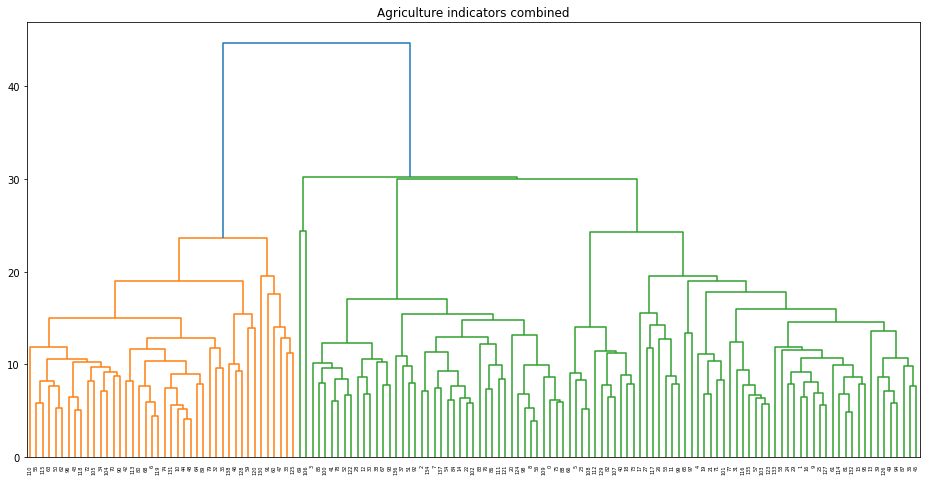

In [21]:
linkage_matrix, y_all = hierarchical_clustering.dendrogram_features_combined(
    agriculture_indicators_dict, "Agriculture indicators combined", feature_extraction=True
)

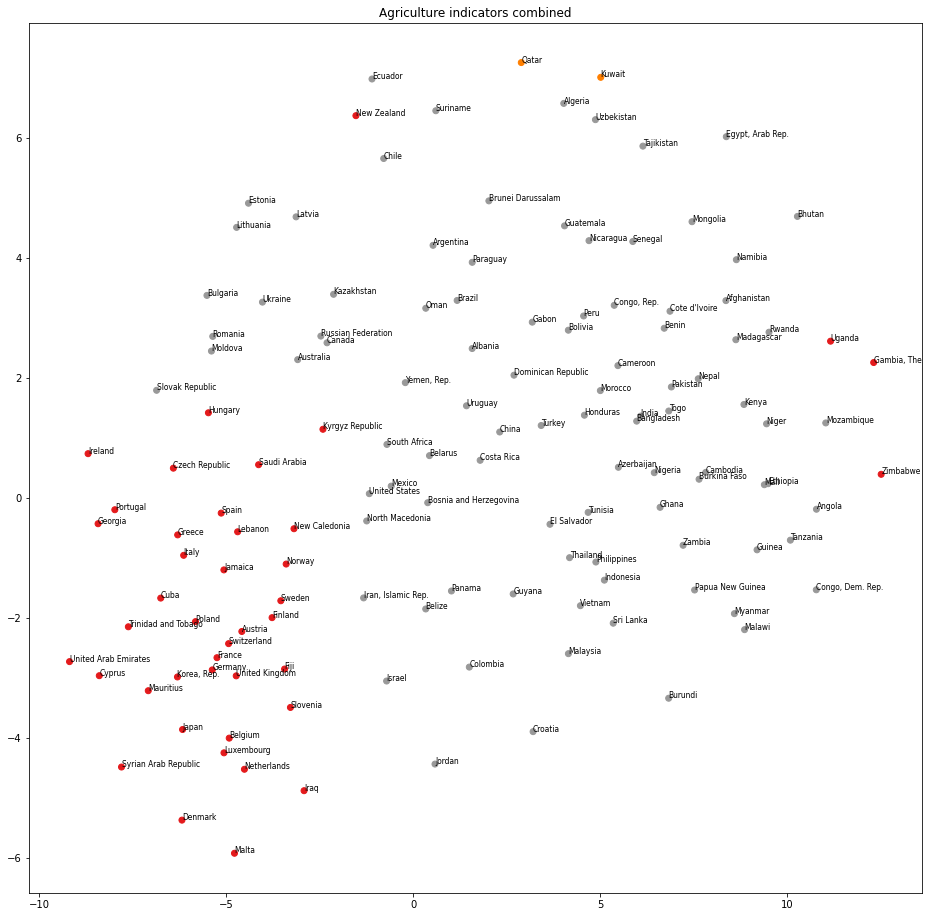

In [23]:
agriculture_indicators_combined_clustered = (
    hierarchical_clustering.cluster_combined_features(
        y_all, linkage_matrix, NUMBER_OF_CLUSTERS_AGRICULTURE_INDICATORS_COMBINED_EXTRACTION
    )
)
data_combined_embedded_visualization(
    agriculture_indicators_combined_clustered, "Agriculture indicators combined"
)

# Health indicators

In [34]:
NUMBER_OF_CLUSTERS_HEALTH_INDICATORS = {
    "Adolescent fertility rate (births per 1,000 women ages 15-19)": 2,
    "Age dependency ratio (% of working-age population)": 2,
    "Birth rate, crude (per 1,000 people)": 2,
    "Death rate, crude (per 1,000 people)": 2,
    "Fertility rate, total (births per woman)": 2,
    "Immunization, DPT (% of children ages 12-23 months)": 2,
    "Immunization, measles (% of children ages 12-23 months)": 2,
    "Incidence of tuberculosis (per 100,000 people)": 2,
    "Life expectancy at birth, total (years)": 2,
    "Mortality rate, under-5 (per 1,000 live births)": 2,
    "Population growth (annual %)": 2,
    "Prevalence of undernourishment (% of population)": 2,
}

NUMBER_OF_CLUSTERS_HEALTH_INDICATORS_EXTRACTION = {
    "Adolescent fertility rate (births per 1,000 women ages 15-19)": 2,
    "Age dependency ratio (% of working-age population)": 3,
    "Birth rate, crude (per 1,000 people)": 2,
    "Death rate, crude (per 1,000 people)": 2,
    "Fertility rate, total (births per woman)": 2,
    "Immunization, DPT (% of children ages 12-23 months)": 2,
    "Immunization, measles (% of children ages 12-23 months)": 3,
    "Incidence of tuberculosis (per 100,000 people)": 3,
    "Life expectancy at birth, total (years)": 2,
    "Mortality rate, under-5 (per 1,000 live births)": 3,
    "Population growth (annual %)": 2,
    "Prevalence of undernourishment (% of population)": 2,
}

NUMBER_OF_CLUSTERS_HEALTH_INDICATORS_COMBINED = 3
NUMBER_OF_CLUSTERS_HEALTH_INDICATORS_COMBINED_EXTRACTION = 2

health_indicators_dict, countries, years = load_time_series(
    indicators=INDICATORS_HEALTH
)

## Each indicator separately - no feature extraction

In [ ]:
linkage_matrices = hierarchical_clustering.dendrogram_each_feature(
    health_indicators_dict
)
health_indicators_clustered = hierarchical_clustering.cluster_each_feature(
    health_indicators_dict, linkage_matrices, NUMBER_OF_CLUSTERS_HEALTH_INDICATORS
)

In [ ]:
data_embedded_visualization(health_indicators_clustered)

## Each indicator separately - with feature extraction

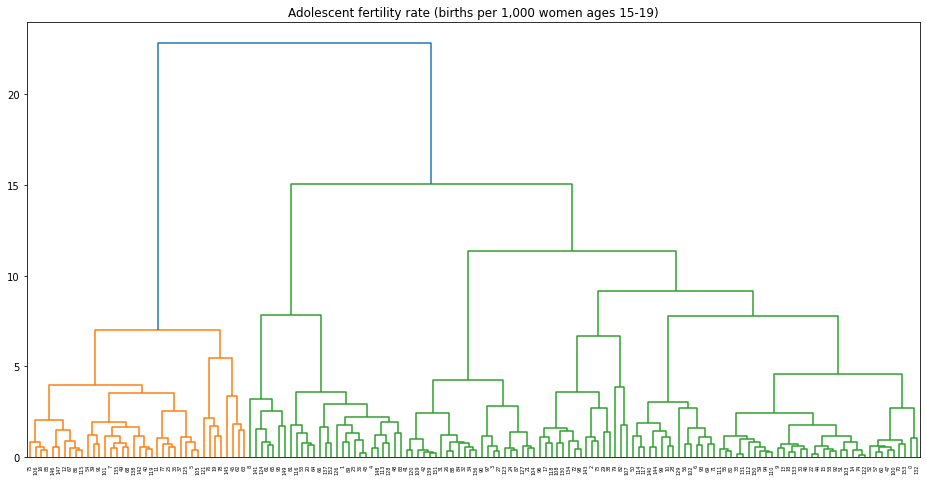

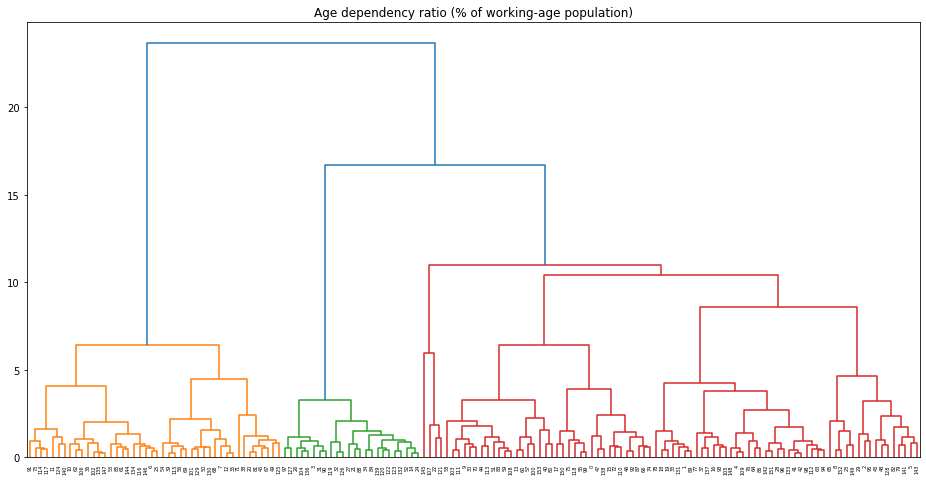

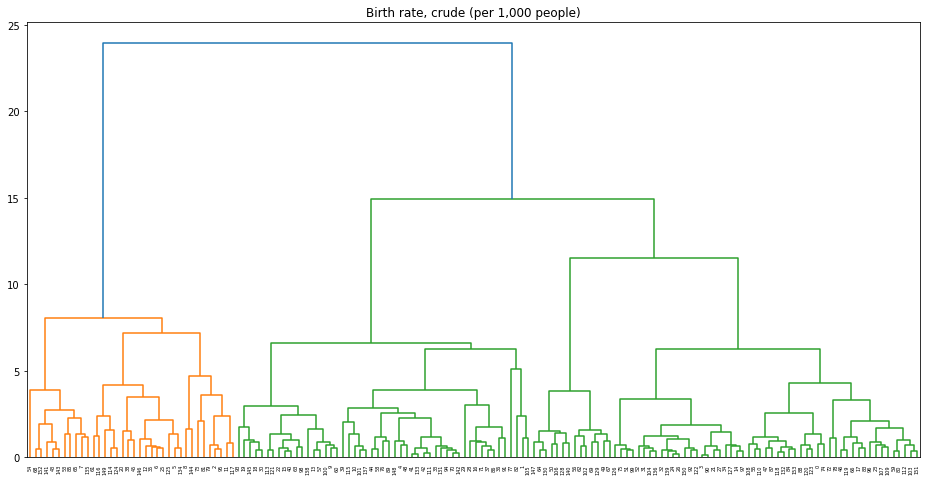

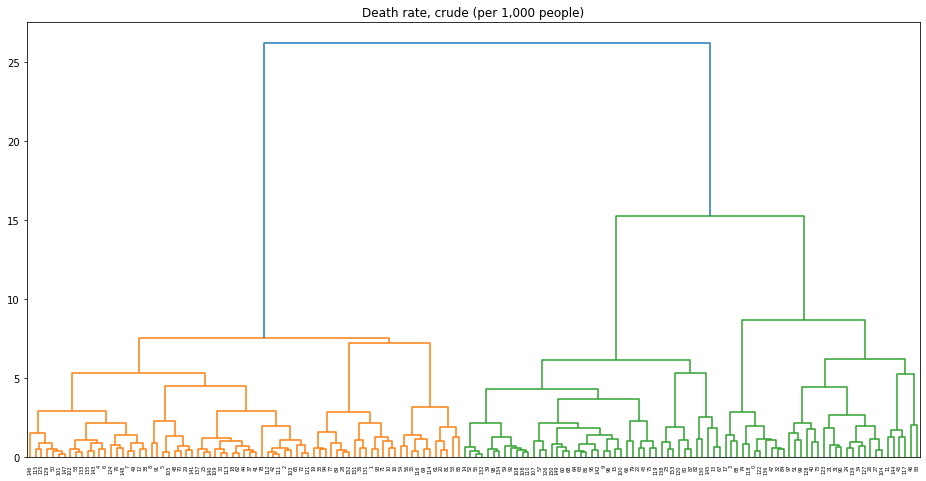

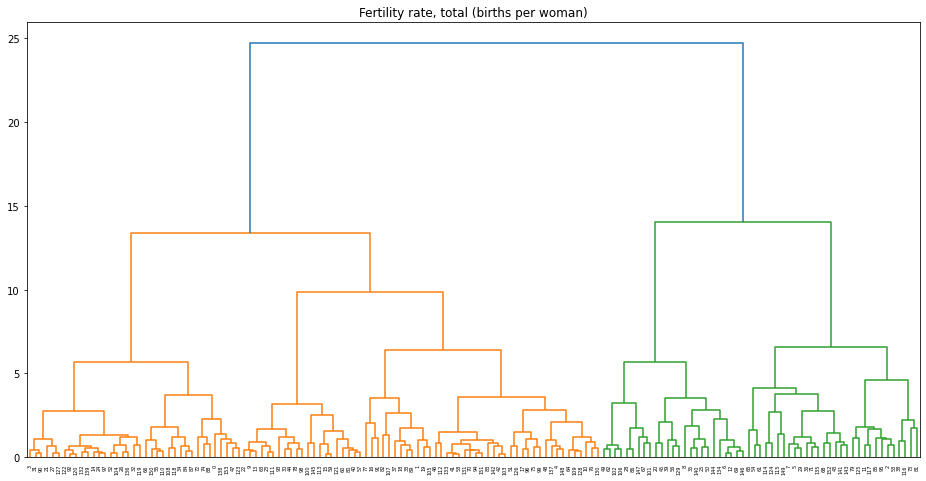

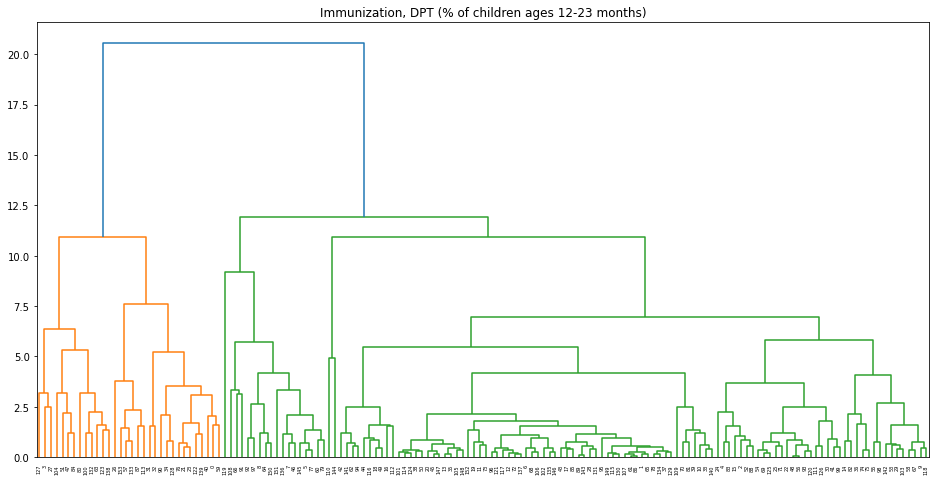

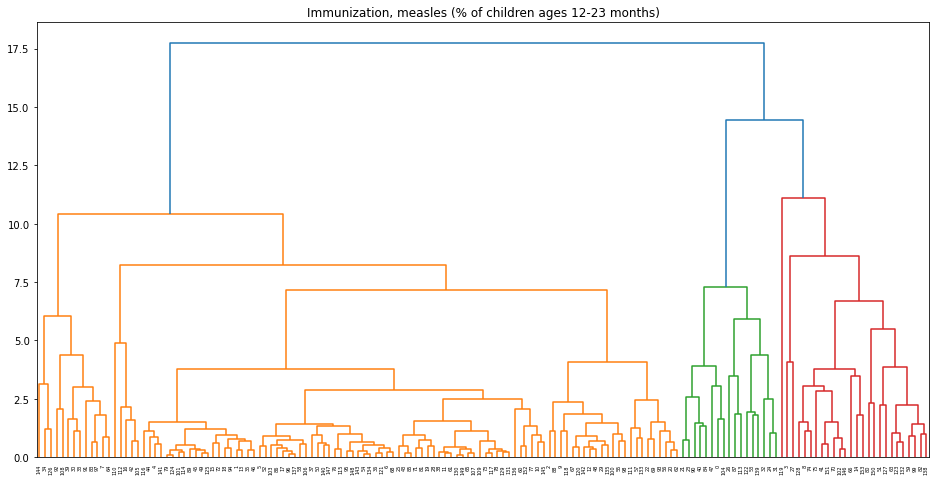

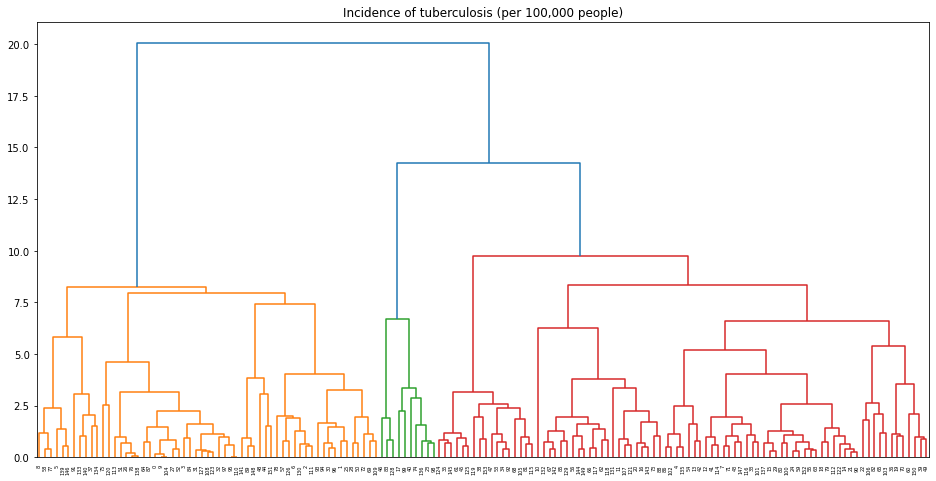

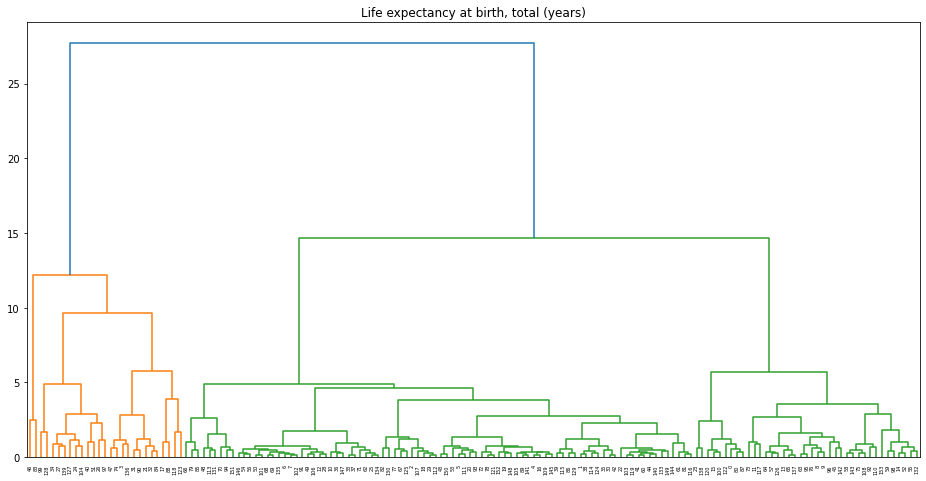

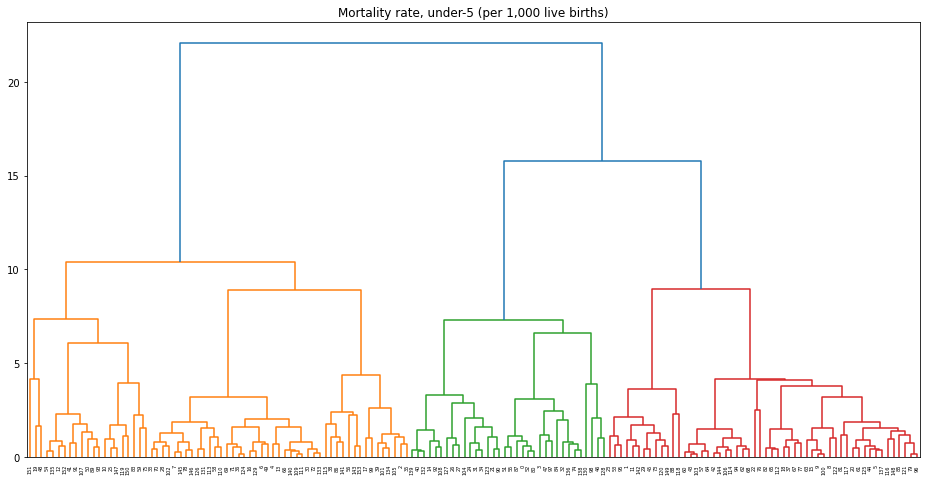

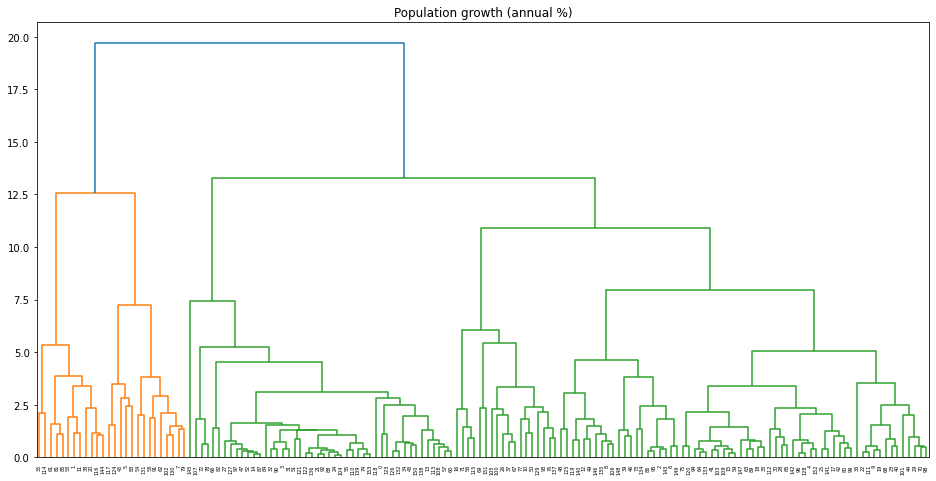

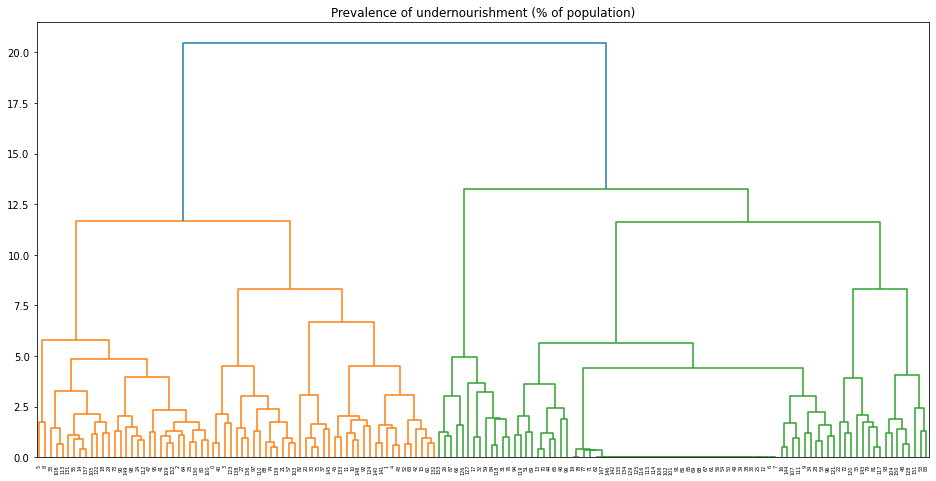

In [30]:
linkage_matrices = hierarchical_clustering.dendrogram_each_feature(
    health_indicators_dict, feature_extraction=True
)
health_indicators_clustered = hierarchical_clustering.cluster_each_feature(
    health_indicators_dict, linkage_matrices, NUMBER_OF_CLUSTERS_HEALTH_INDICATORS_EXTRACTION
)

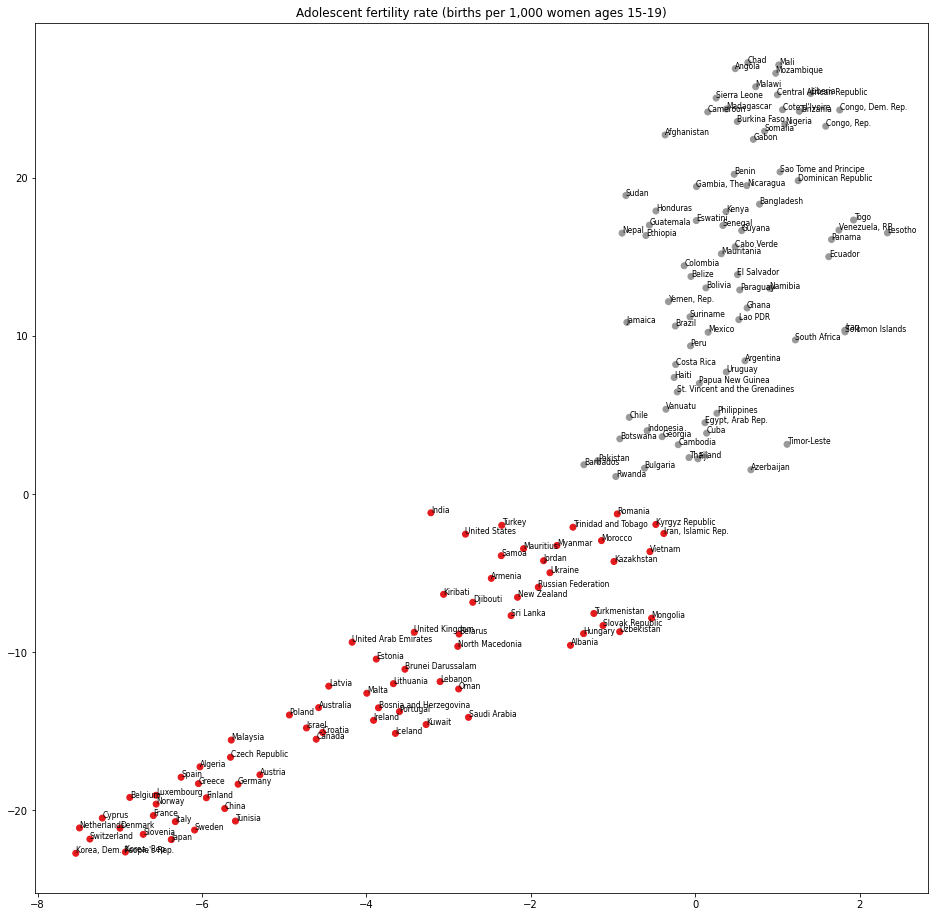

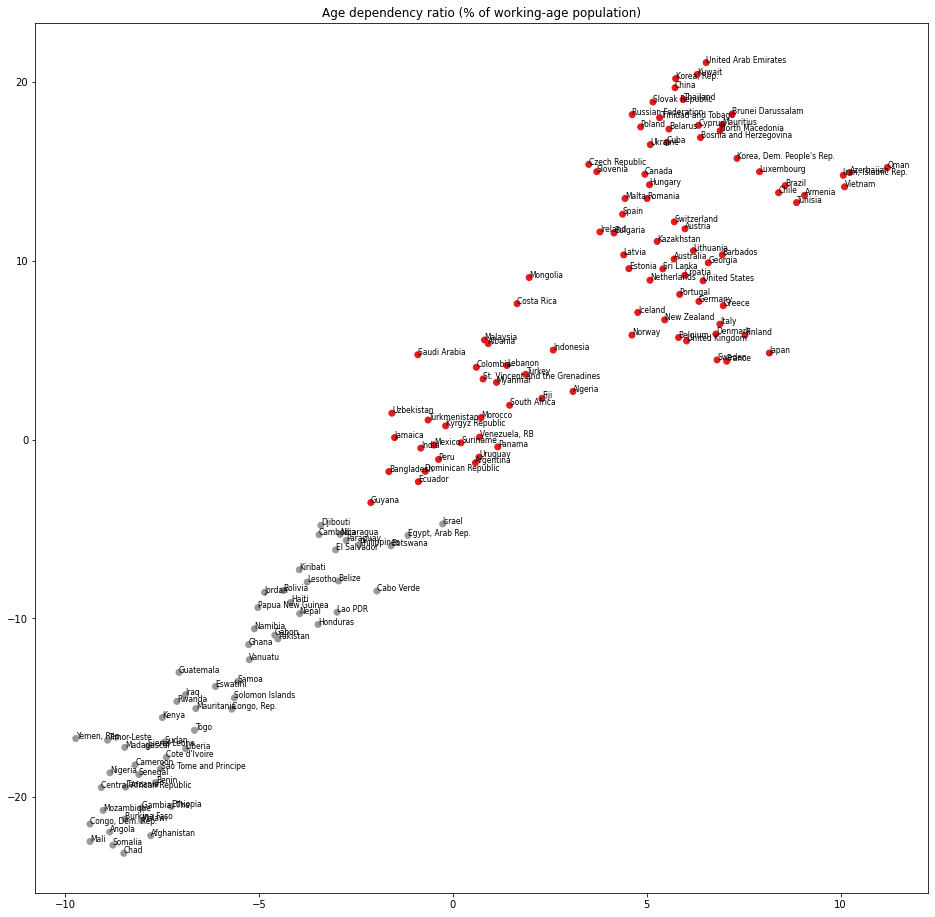

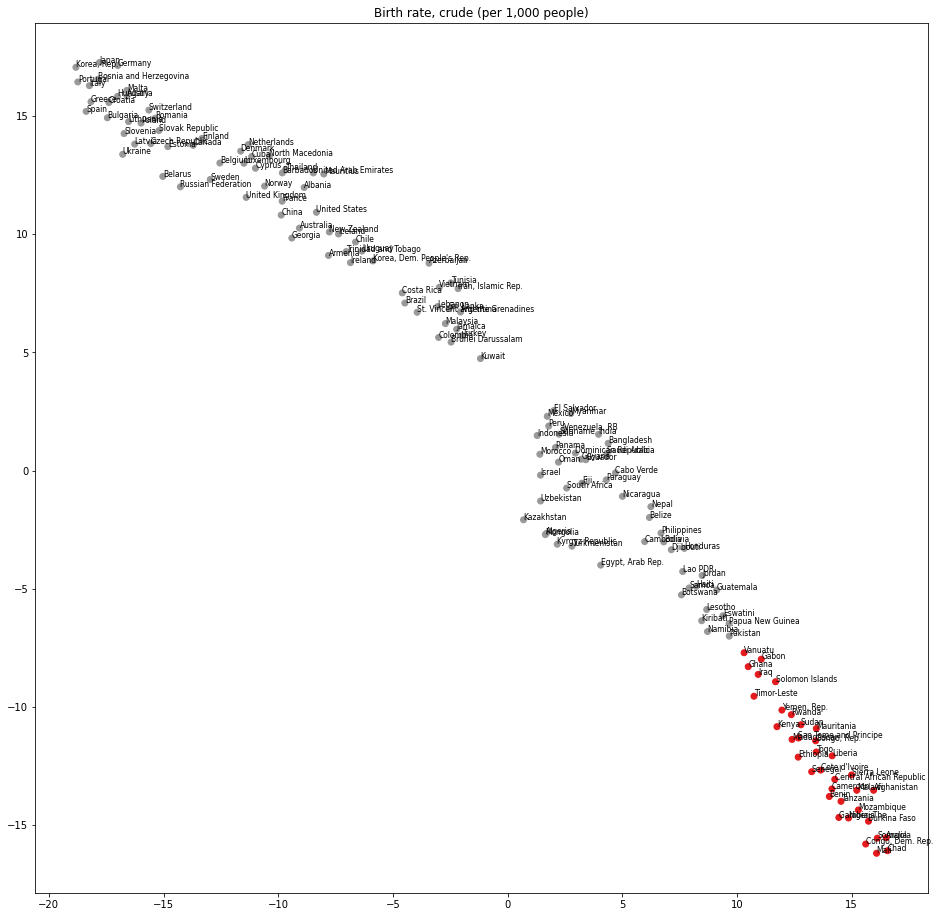

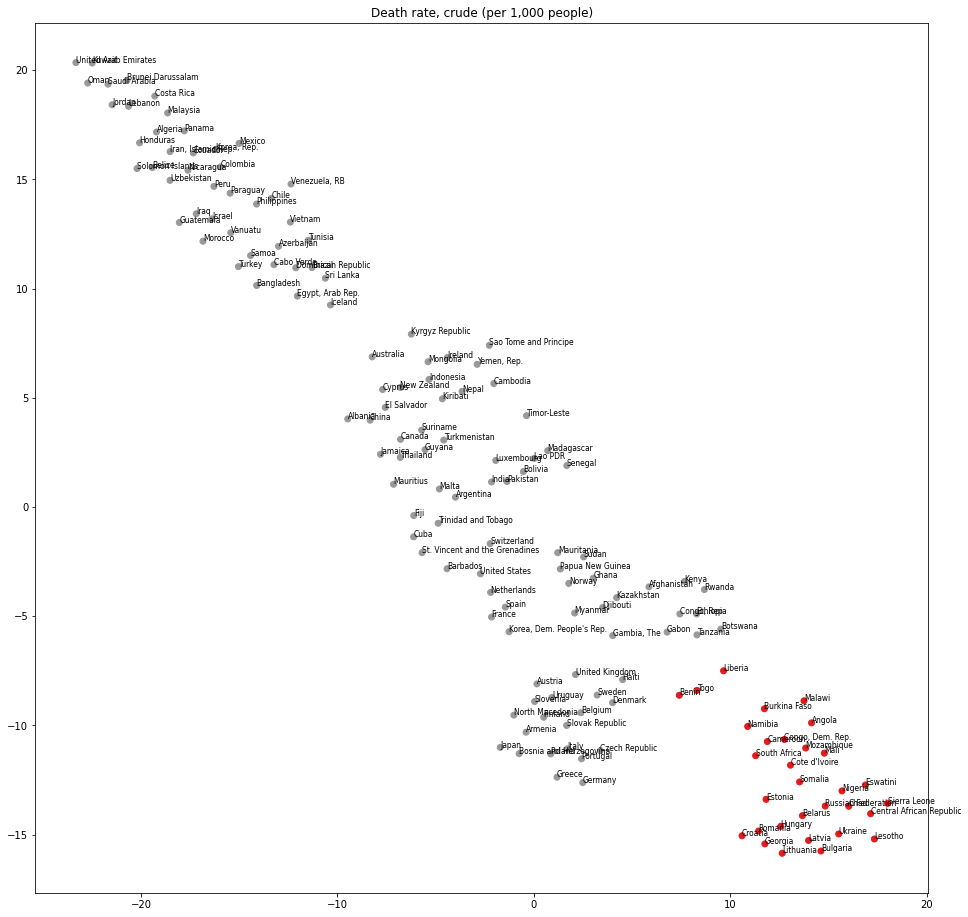

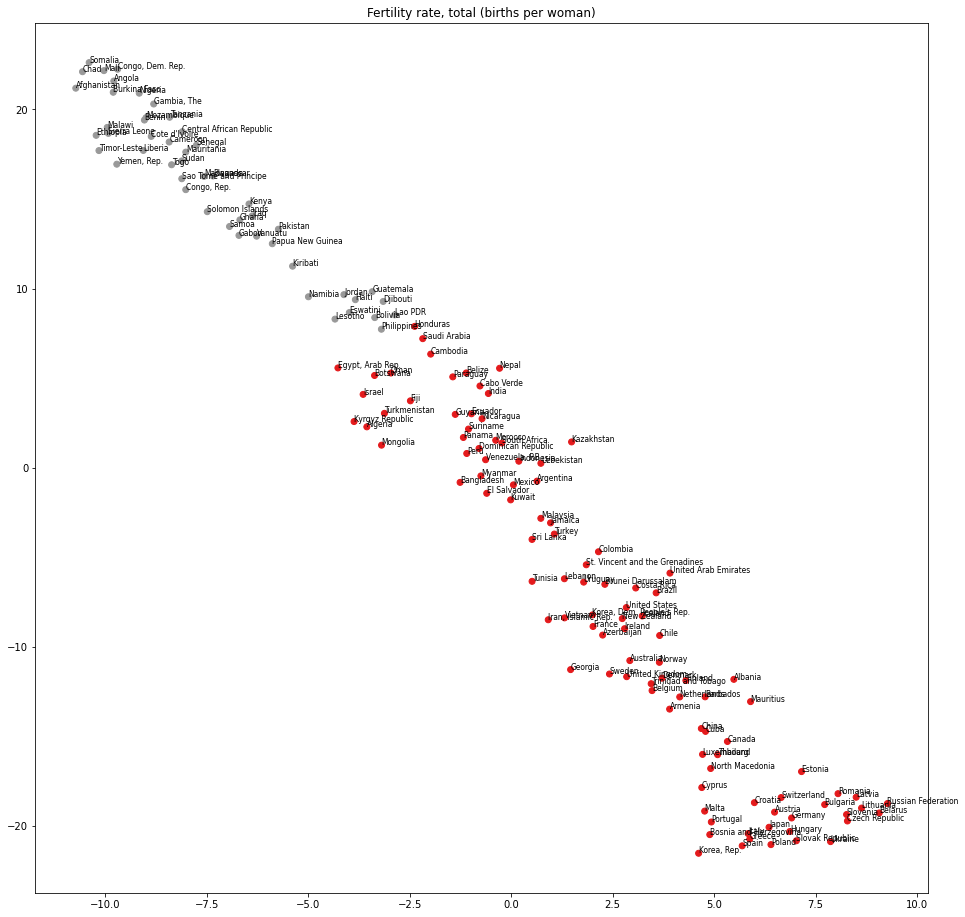

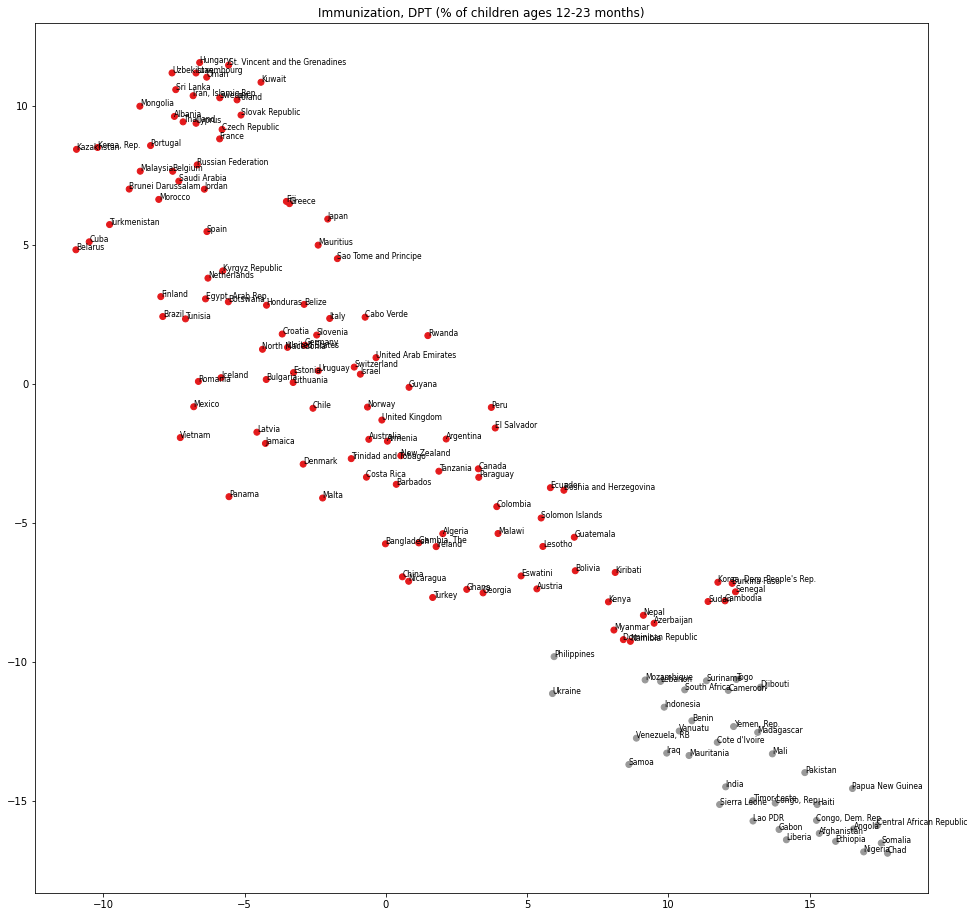

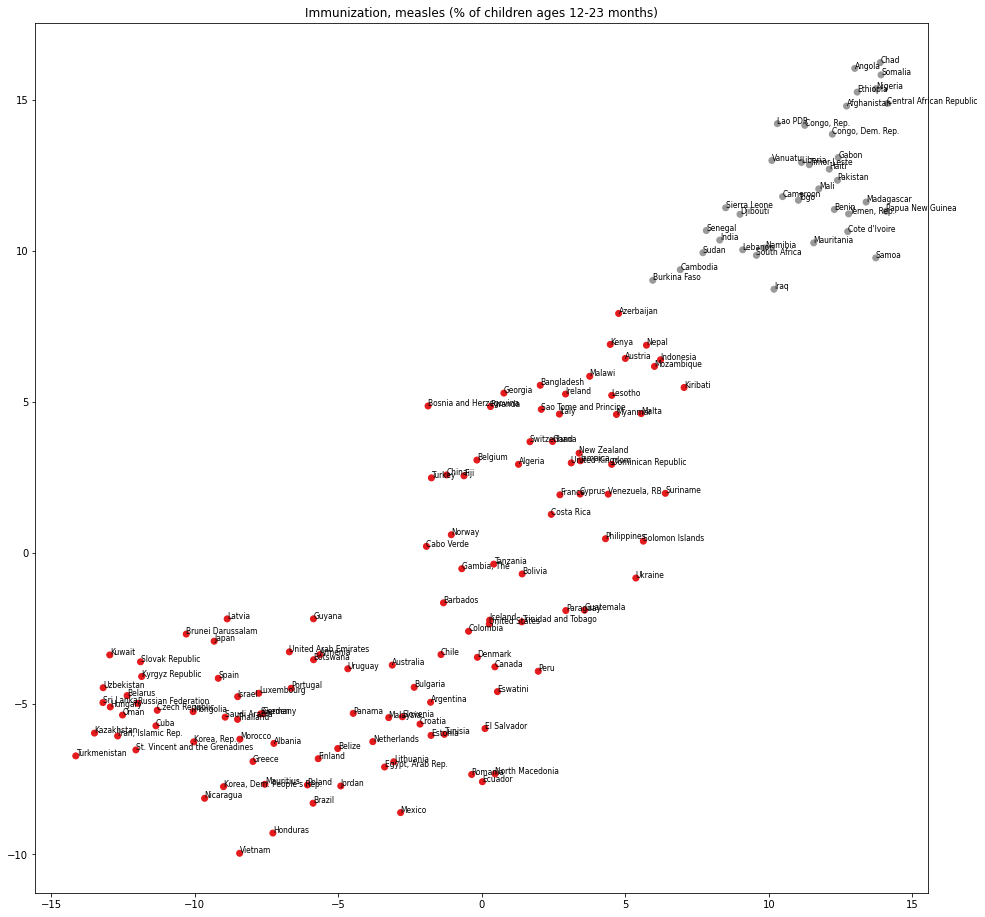

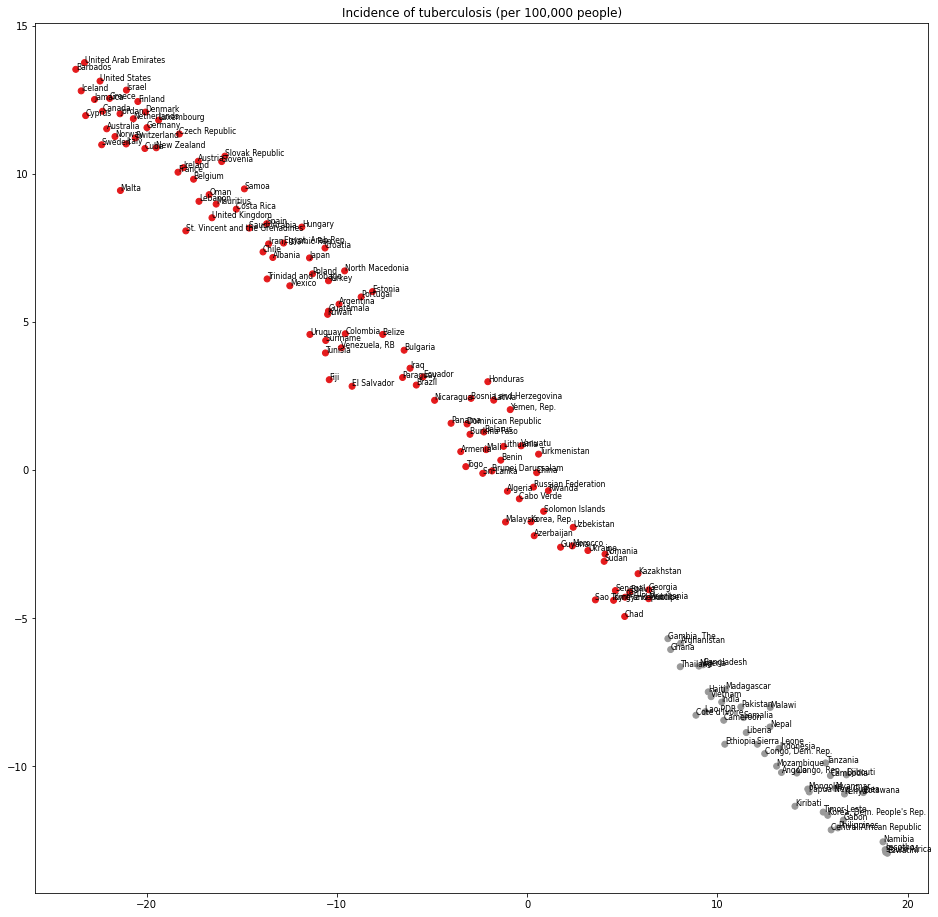

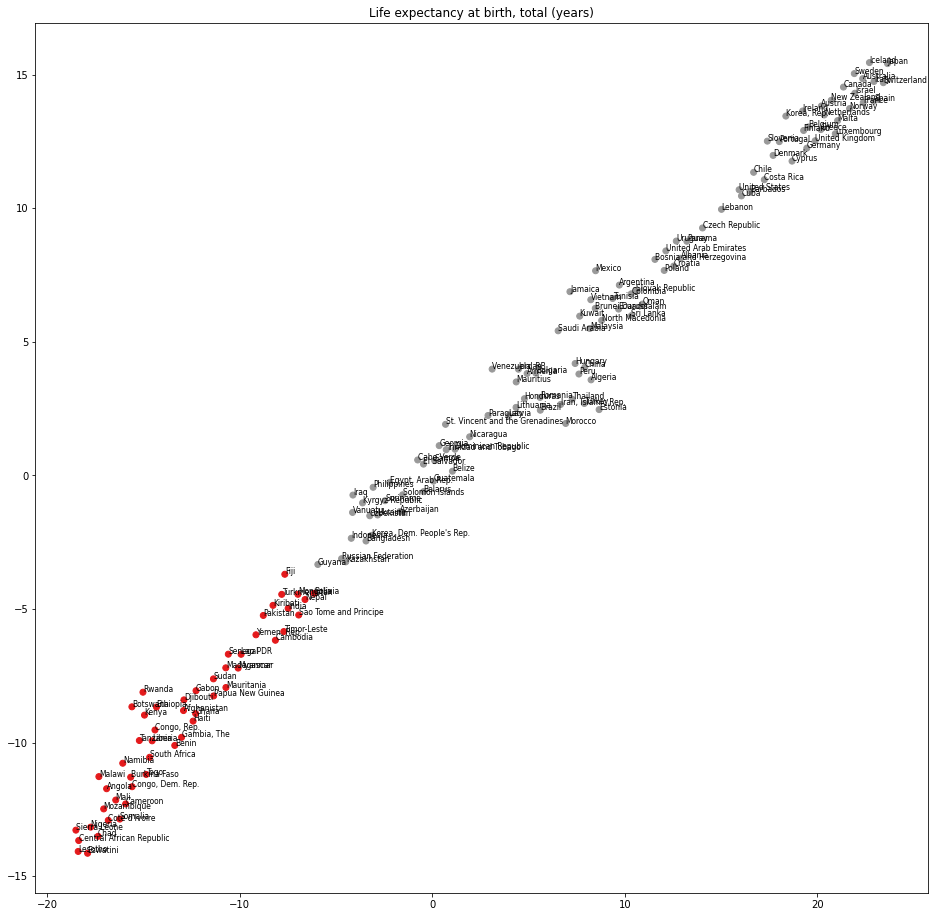

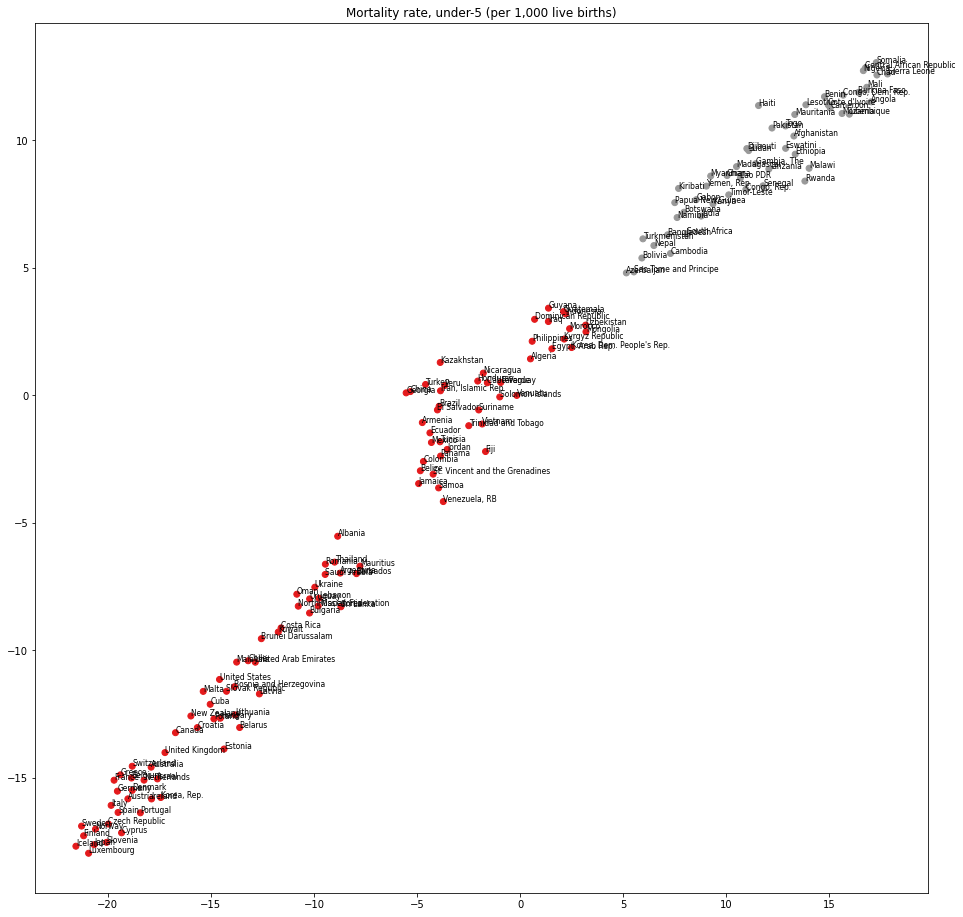

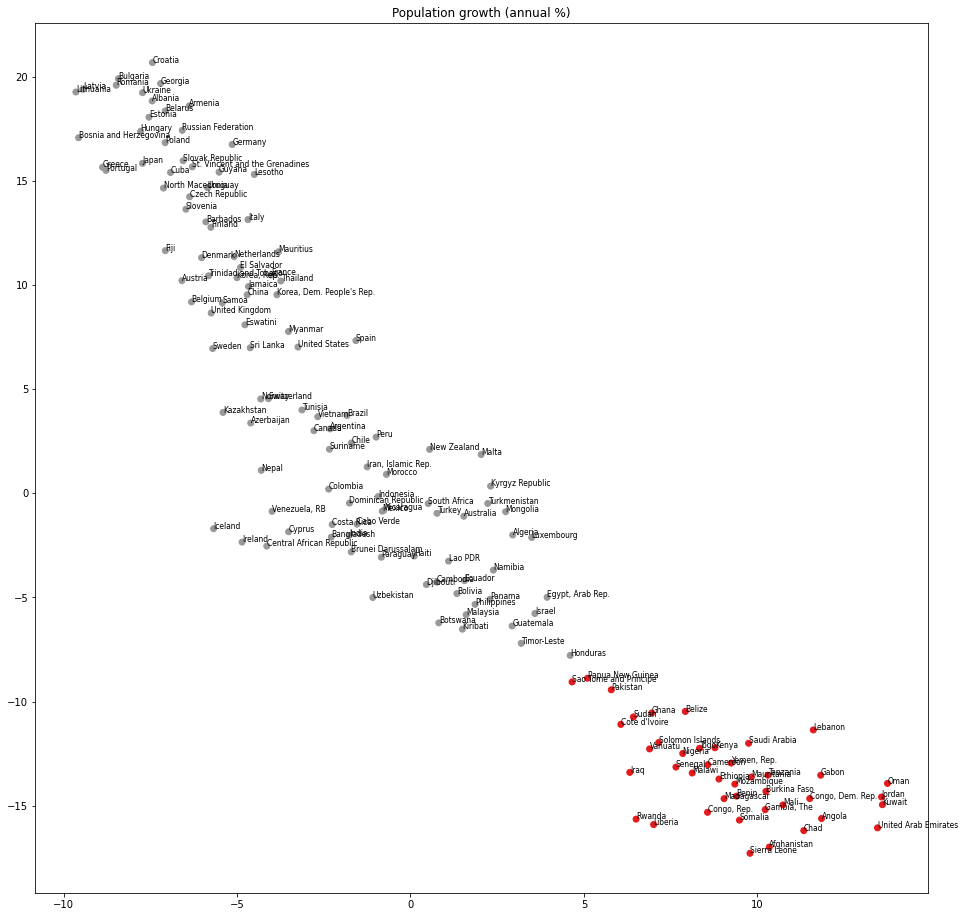

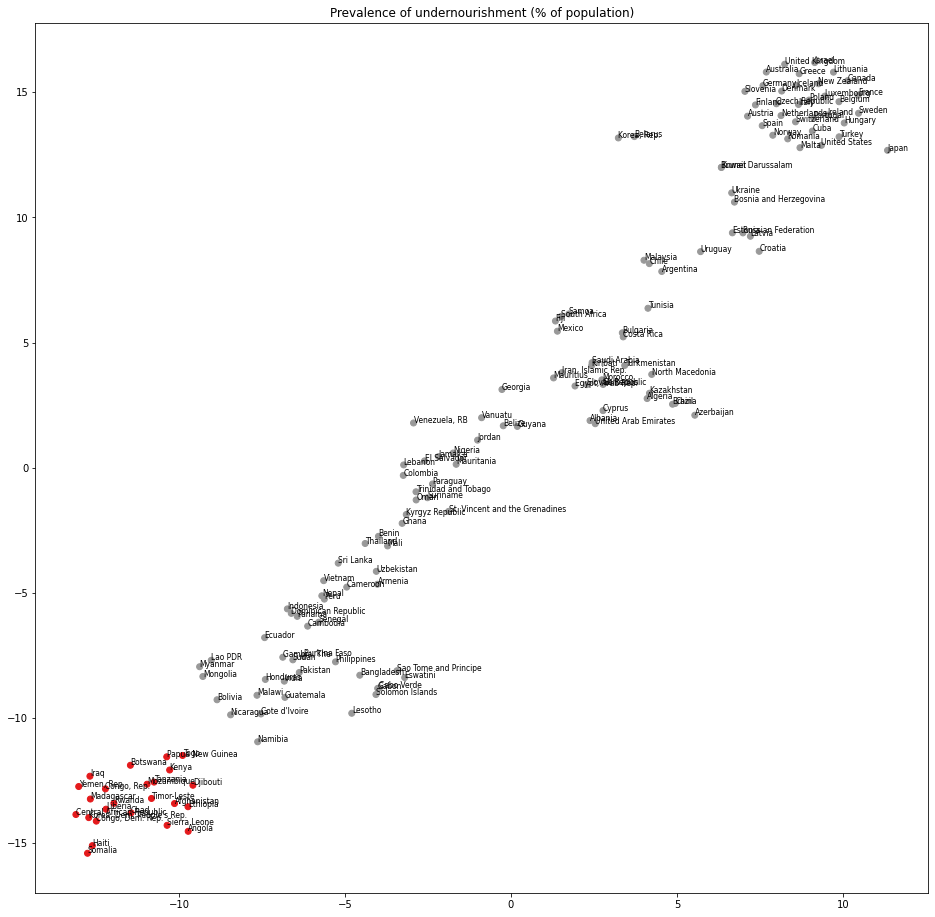

In [29]:
data_embedded_visualization(health_indicators_clustered)

## Combined indicators - no feature extraction

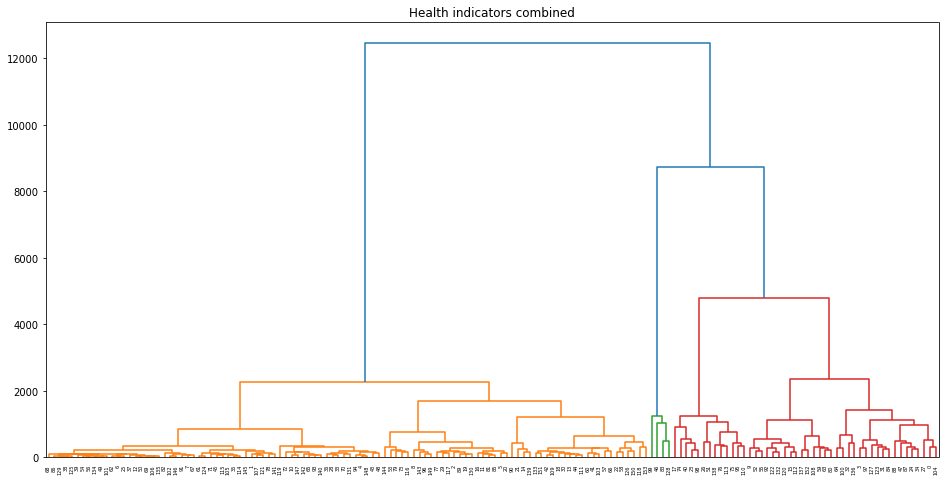

In [36]:
linkage_matrix, y_all = hierarchical_clustering.dendrogram_features_combined(
    health_indicators_dict, "Health indicators combined"
)

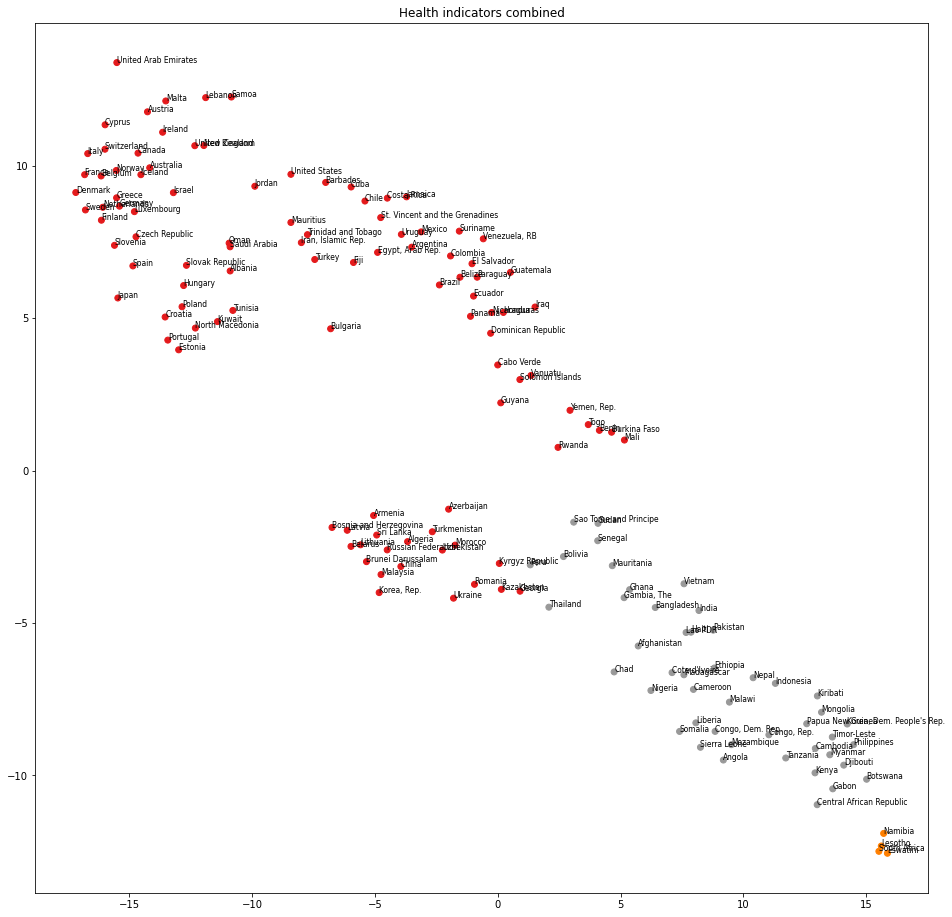

In [37]:
health_indicators_combined_clustered = (
    hierarchical_clustering.cluster_combined_features(
        y_all, linkage_matrix, NUMBER_OF_CLUSTERS_HEALTH_INDICATORS_COMBINED
    )
)
data_combined_embedded_visualization(
    health_indicators_combined_clustered, "Health indicators combined"
)

## Combined indicators - with feature extraction

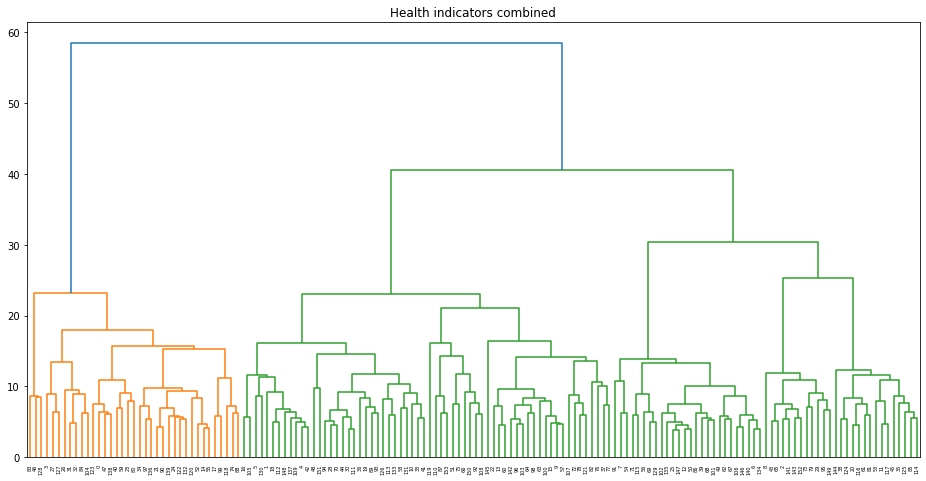

In [38]:
linkage_matrix, y_all = hierarchical_clustering.dendrogram_features_combined(
    health_indicators_dict, "Health indicators combined", feature_extraction=True
)

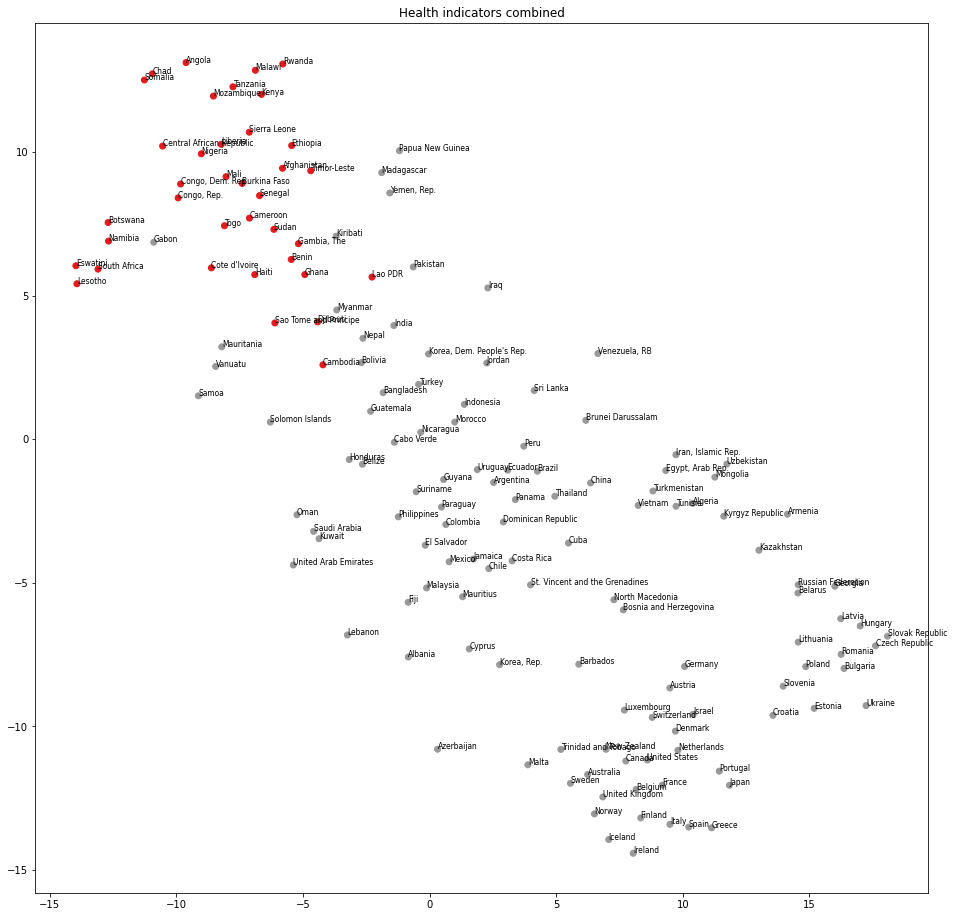

In [39]:
health_indicators_combined_clustered = (
    hierarchical_clustering.cluster_combined_features(
        y_all, linkage_matrix, NUMBER_OF_CLUSTERS_HEALTH_INDICATORS_COMBINED_EXTRACTION
    )
)
data_combined_embedded_visualization(
    health_indicators_combined_clustered, "Health indicators combined"
)

# Economy indicators

In [46]:
NUMBER_OF_CLUSTERS_ECONOMY_INDICATORS = {
    "Agriculture, forestry, and fishing, value added (% of GDP)": 2,
    "Exports of goods and services (% of GDP)": 2,
    "GDP growth (annual %)": 3,
    "GDP per capita (current US$)": 2,
    "GNI per capita, Atlas method (current US$)": 2,
    "Gross capital formation (% of GDP)": 2,
    "Gross savings (% of GDP)": 2,
    "Imports of goods and services (% of GDP)": 2,
    "Industry (including construction), value added (% of GDP)": 2,
    "Inflation, GDP deflator (annual %)": 2,
    "Inflation, consumer prices (annual %)": 2,
    "Medium and high-tech manufacturing value added (% manufacturing value added)": 2,
}

NUMBER_OF_CLUSTERS_ECONOMY_INDICATORS_EXTRACTION = {
    "Agriculture, forestry, and fishing, value added (% of GDP)": 2,
    "Exports of goods and services (% of GDP)": 2,
    "GDP growth (annual %)": 3,
    "GDP per capita (current US$)": 3,
    "GNI per capita, Atlas method (current US$)": 3,
    "Gross capital formation (% of GDP)": 4,
    "Gross savings (% of GDP)": 4,
    "Imports of goods and services (% of GDP)": 3,
    "Industry (including construction), value added (% of GDP)": 4,
    "Inflation, GDP deflator (annual %)": 4,
    "Inflation, consumer prices (annual %)": 4,
    "Medium and high-tech manufacturing value added (% manufacturing value added)": 4,
}

NUMBER_OF_CLUSTERS_ECONOMY_INDICATORS_COMBINED = 2
NUMBER_OF_CLUSTERS_ECONOMY_INDICATORS_COMBINED_EXTRACTION = 3

economy_indicators_dict, countries, years = load_time_series(
    indicators=INDICATORS_ECONOMY
)

## Each indicator separately - no feature extraction

In [ ]:
linkage_matrices = hierarchical_clustering.dendrogram_each_feature(
    economy_indicators_dict
)
economy_indicators_clustered = hierarchical_clustering.cluster_each_feature(
    economy_indicators_dict, linkage_matrices, NUMBER_OF_CLUSTERS_ECONOMY_INDICATORS
)

In [ ]:
data_embedded_visualization(economy_indicators_clustered)

In [44]:
## Each indicator separately - with feature extraction

In [ ]:
linkage_matrices = hierarchical_clustering.dendrogram_each_feature(
    economy_indicators_dict, feature_extraction=True
)
economy_indicators_clustered = hierarchical_clustering.cluster_each_feature(
    economy_indicators_dict, linkage_matrices, NUMBER_OF_CLUSTERS_ECONOMY_INDICATORS_EXTRACTION
)

In [ ]:
data_embedded_visualization(economy_indicators_clustered)

## Combined indictors - no feature extraction

In [ ]:
linkage_matrix, y_all = hierarchical_clustering.dendrogram_features_combined(
    economy_indicators_dict, "Economy indicators combined"
)

In [ ]:
economy_indicators_combined_clustered = (
    hierarchical_clustering.cluster_combined_features(
        y_all, linkage_matrix, NUMBER_OF_CLUSTERS_ECONOMY_INDICATORS_COMBINED
    )
)
data_combined_embedded_visualization(
    economy_indicators_combined_clustered, "Economy indicators combined"
)

## Combined indictors - with feature extraction

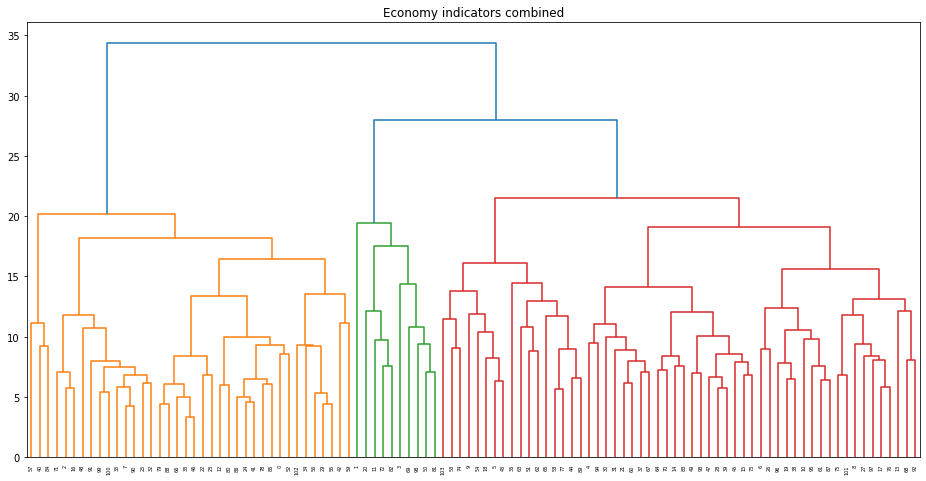

In [45]:
linkage_matrix, y_all = hierarchical_clustering.dendrogram_features_combined(
    economy_indicators_dict, "Economy indicators combined", feature_extraction=True
)

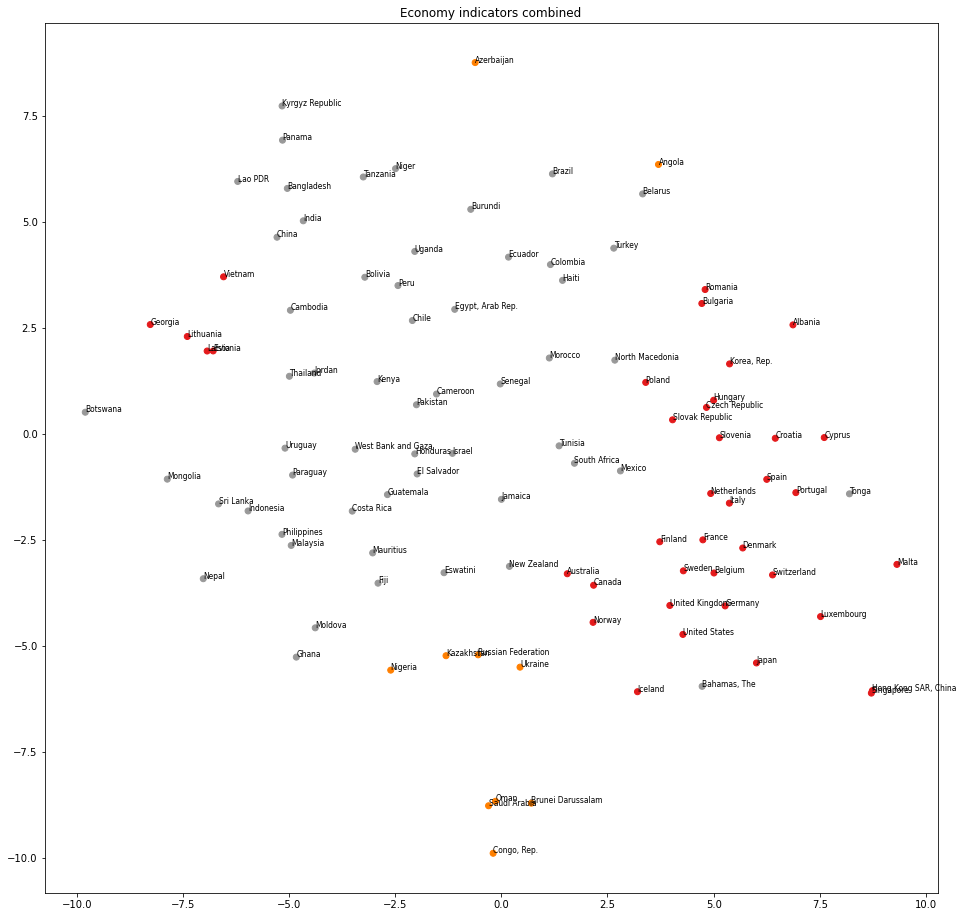

In [47]:
economy_indicators_combined_clustered = (
    hierarchical_clustering.cluster_combined_features(
        y_all, linkage_matrix, NUMBER_OF_CLUSTERS_ECONOMY_INDICATORS_COMBINED_EXTRACTION
    )
)
data_combined_embedded_visualization(
    economy_indicators_combined_clustered, "Economy indicators combined"
)

# All indcitaors

In [52]:
NUMBER_OF_CLUSTERS_ALL_INDICATORS_COMBINED = 2
NUMBER_OF_CLUSTERS_ALL_INDICATORS_COMBINED_EXTRACTION = 4

all_indicators_dict, countries, years = load_time_series(indicators=ALL_INDICATORS)

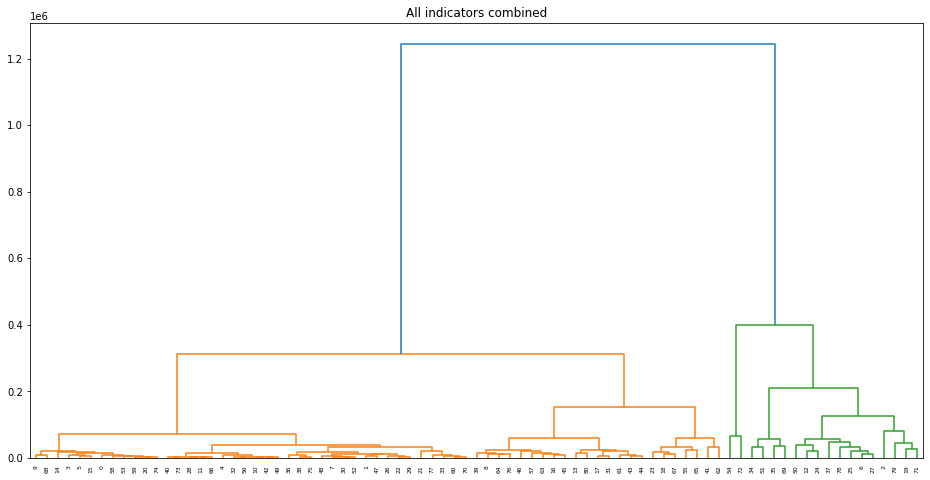

In [57]:
linkage_matrix, y_all = hierarchical_clustering.dendrogram_features_combined(
    all_indicators_dict, "All indicators combined"
)

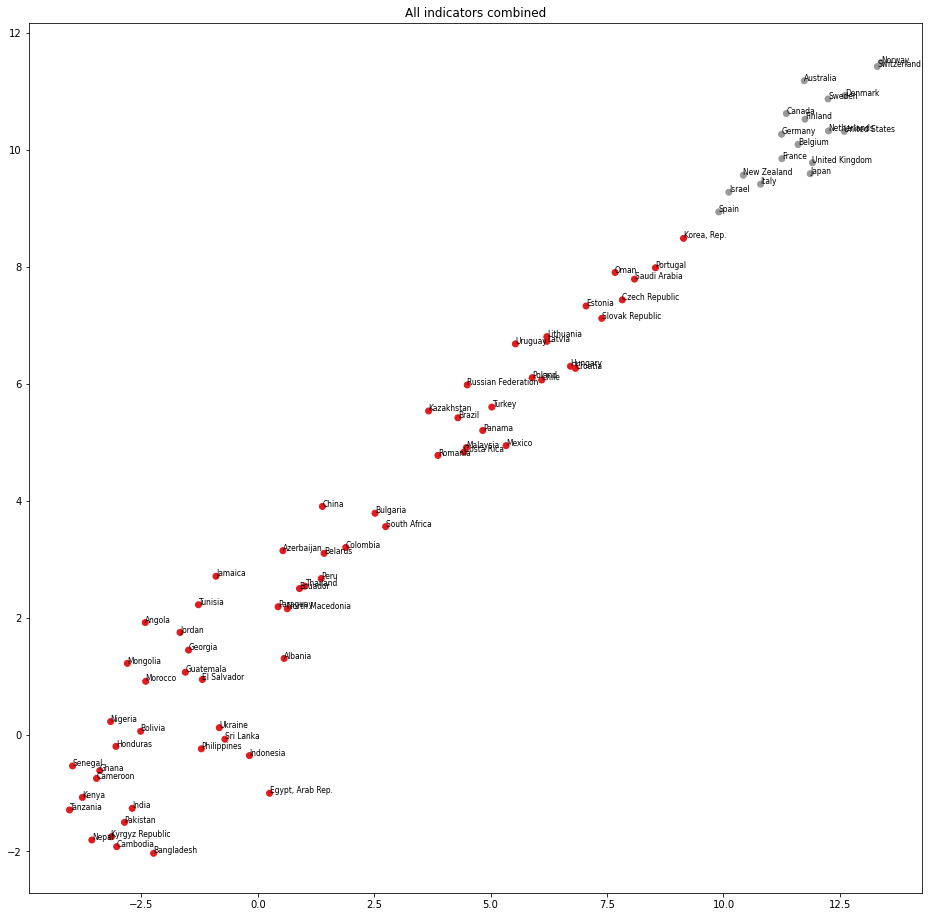

In [58]:
all_indicators_combined_clustered = hierarchical_clustering.cluster_combined_features(
    y_all, linkage_matrix, NUMBER_OF_CLUSTERS_ECONOMY_INDICATORS_COMBINED
)
data_combined_embedded_visualization(
    all_indicators_combined_clustered, "All indicators combined"
)

## With feature extraction

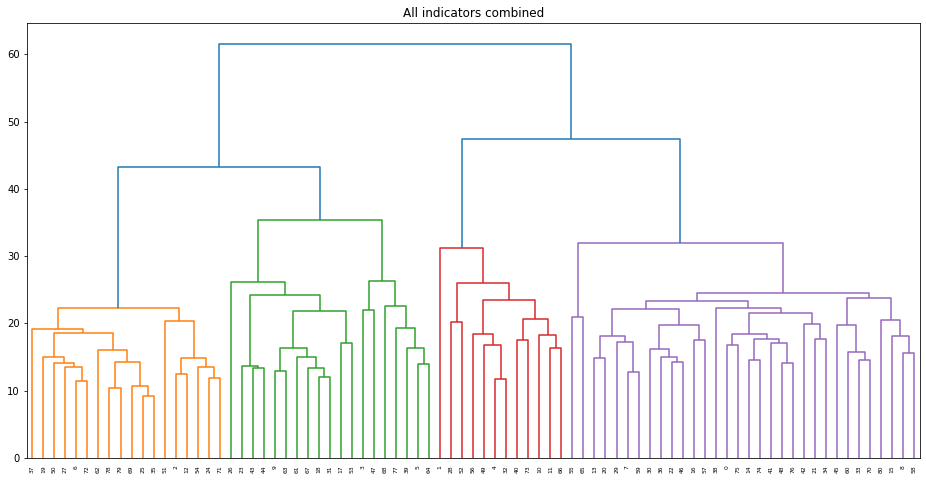

In [59]:
linkage_matrix, y_all = hierarchical_clustering.dendrogram_features_combined(
    all_indicators_dict, "All indicators combined", feature_extraction=True
)

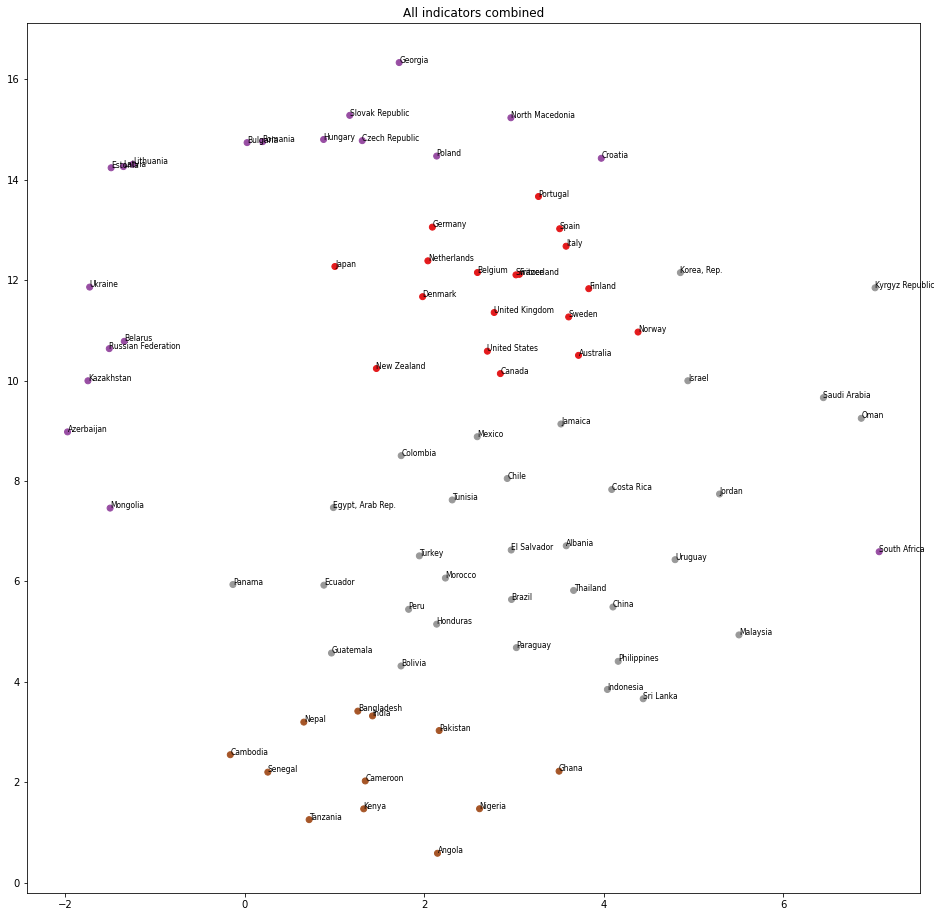

In [60]:
all_indicators_combined_clustered = hierarchical_clustering.cluster_combined_features(
    y_all, linkage_matrix, NUMBER_OF_CLUSTERS_ALL_INDICATORS_COMBINED_EXTRACTION
)
data_combined_embedded_visualization(
    all_indicators_combined_clustered, "All indicators combined"
)